In [112]:
%pip install pandas
%pip install openpyxl
import pandas as pd
import io


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [113]:
nettit = pd.read_csv('netflix_titles.csv')
net = pd.read_excel('netflix.xlsx')


In [114]:
net.head()

,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,2023-03-29 12:00:00,00:24:06,NaN,The Night Agent: Staffel 1: Wahlwiederholung (...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:25:35,00:25:35,DE (Germany)
1,2023-03-29 11:45:00,00:14:44,NaN,The Night Agent: Staffel 1: Der Anruf (Folge 1),NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:51:50,00:51:50,DE (Germany)
2,2023-03-29 10:40:00,00:37:05,NaN,The Night Agent: Staffel 1: Der Anruf (Folge 1),NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,00:37:06,Not latest view,DE (Germany)
3,2023-03-21 12:23:00,00:00:01,NaN,Ginny & Georgia: Staffel 2: Ich bin nicht Cind...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,01:04:33,01:04:33,DE (Germany)
4,2023-03-21 12:22:00,00:00:08,NaN,Ginny & Georgia: Staffel 2: Horcht! Die Dunkel...,NaN,Apple iPad Pro 12.9in 4th Gen (Wi-Fi) iPad,01:00:29,01:00:29,DE (Germany)


In [115]:
import gender_guesser.detector as gender
d = gender.Detector()

def get_gender(name):
    first_name = str(name).split()[0]
    return d.get_gender(first_name)

nettit_directors = nettit[nettit['director'].notna()].copy()
nettit_directors['gender'] = nettit_directors['director'].apply(get_gender)

gender_mapping = {
    'female': 'female',
    'mostly_female': 'female',
    'andy': 'unknown',
    'unknown': 'unknown',
    'male': 'male',
    'mostly_male': 'male'
}

nettit_directors['gender'] = nettit_directors['gender'].replace(gender_mapping)

In [116]:
old_movies = nettit[nettit['release_year'] == nettit['release_year'].min()]
old_movies

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...


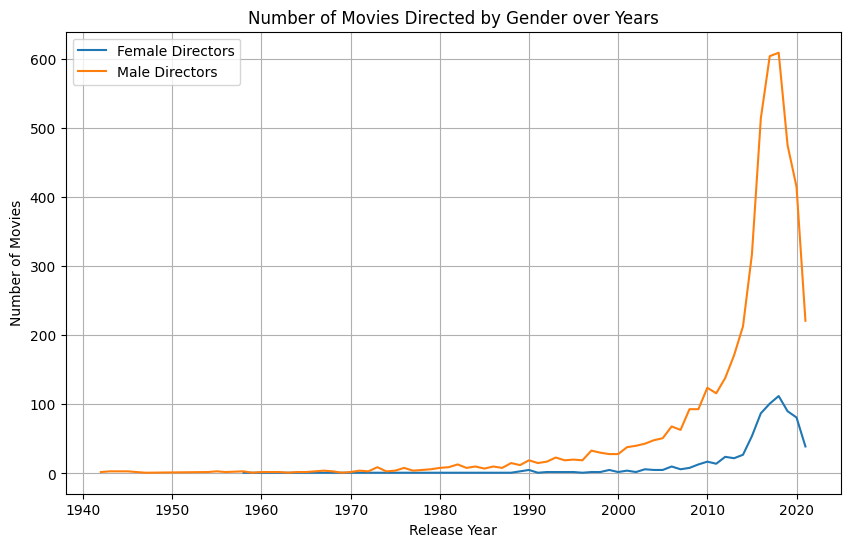

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter DataFrame for female directors
female_directors = nettit_directors[nettit_directors['gender'].str.endswith('female')]

# Filter DataFrame for male directors
male_directors = nettit_directors[nettit_directors['gender'].str.endswith('male')]



# Count the occurrences of each release year for female directors
female_counts = female_directors['release_year'].value_counts().sort_index()

# Count the occurrences of each release year for male directors
male_counts = male_directors['release_year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=female_counts.index, y=female_counts.values, label='Female Directors')
sns.lineplot(x=male_counts.index, y=male_counts.values, label='Male Directors')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Directed by Gender over Years')
plt.legend()
plt.grid(True)
plt.show()

In [131]:
nettit_directors = nettit_directors[nettit_directors['release_year'] >= 2000]

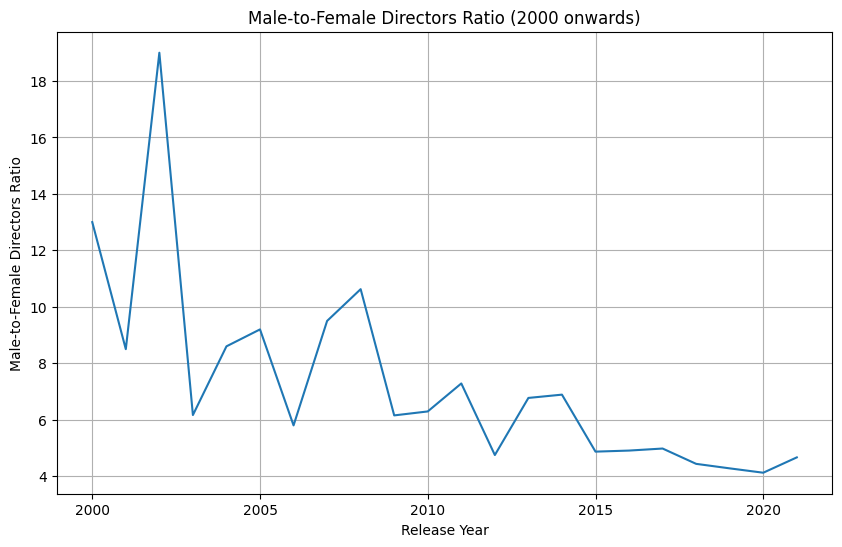

In [132]:
# Filter DataFrame for female directors from 2000 onwards
female_directors_2000 = nettit_directors[nettit_directors['gender'].str.endswith('female')]

# Filter DataFrame for male directors from 2000 onwards
male_directors_2000 = nettit_directors[nettit_directors['gender'].str.endswith('male')]

# Count the occurrences of each release year for female directors from 2000 onwards
female_counts_2000 = female_directors['release_year'].value_counts().sort_index()

# Count the occurrences of each release year for male directors from 2000 onwards
male_counts_2000 = male_directors['release_year'].value_counts().sort_index()

# Calculate the ratio of male to female directors for each year from 2000 onwards
ratio_2000 = male_counts_2000 / female_counts_2000

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=ratio_2000.index, y=ratio_2000.values)
plt.xlabel('Release Year')
plt.ylabel('Male-to-Female Directors Ratio')
plt.title('Male-to-Female Directors Ratio (2000 onwards)')
plt.grid(True)
plt.show()



In [133]:
ages_detailed = {
    'PG-13': 13,
    'TV-MA': 18, 
    'PG': 0, 
    'TV-14' : 14, 
    'TV-PG': 0, 
    'TV-Y': 0, 
    'TV-Y7': 7, 
    'R': 17,
    'TV-G': 0, 
    'G': 0, 
    'NC-17': 18, 
    'NR': 1, 
    'TV-Y7-FV': 7
}

ages = {
    'PG-13': '13/14',
    'TV-MA': '17/18', 
    'PG': '0', 
    'TV-14' : '13/14',
    'TV-PG': '0', 
    'TV-Y': '0', 
    'TV-Y7': '7', 
    'R': '17/18',
    'TV-G': '0', 
    'G': '0', 
    'NC-17': '17/18', 
    'TV-Y7-FV': '7'
}

def get_age(rating):
    if rating in ages.keys():
        return ages[rating]
    else:
        return -1

nettit_directors['min_age'] = nettit_directors['rating'].apply(get_age)
nettit_min_age = nettit_directors[nettit_directors['min_age'] != -1]




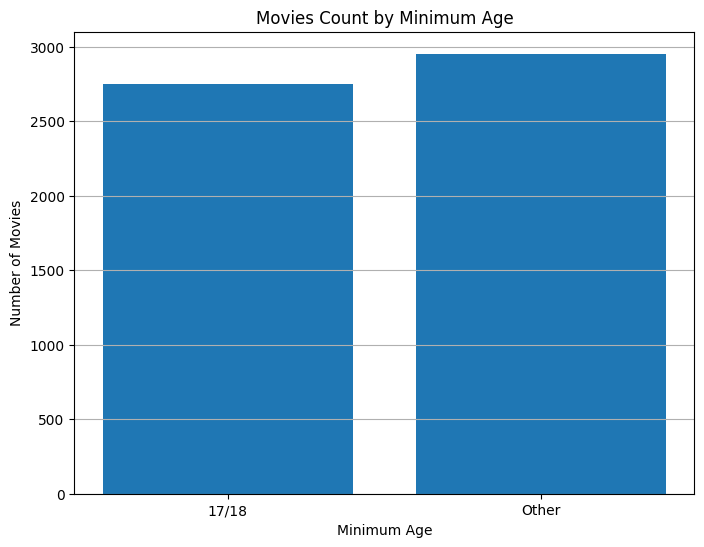

In [134]:

# Count occurrences of '17/18' and other values in the 'min_age' column
min_age_counts = nettit_directors['min_age'].value_counts()

# Extract counts for '17/18' and other values
age_17_18 = min_age_counts.get('17/18', 0)
other_age = min_age_counts.sum() - age_17_18

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['17/18', 'Other'], [age_17_18, other_age])
plt.xlabel('Minimum Age')
plt.ylabel('Number of Movies')
plt.title('Movies Count by Minimum Age')
plt.grid(axis='y')
plt.show()

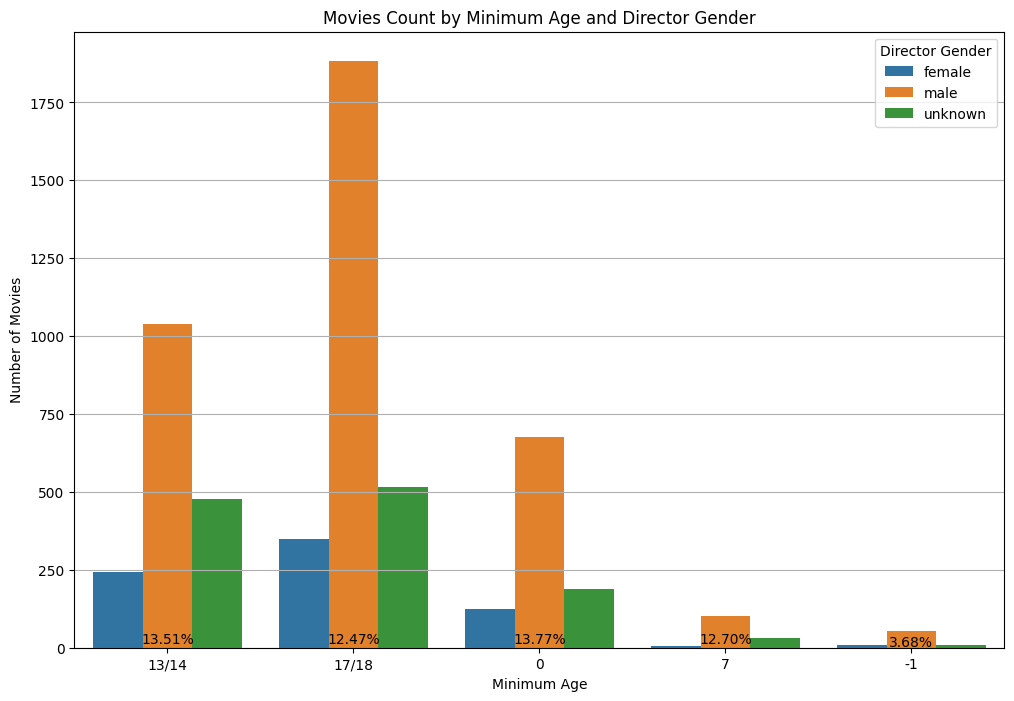

In [122]:
# Calculate the ratio of male to female directors for each value of 'min_age'
ratio_by_age = (nettit_directors.groupby(['min_age', 'gender']).size() /
                nettit_directors.groupby(['min_age']).size()).unstack()

female_percentage_by_age = (nettit_directors[nettit_directors['gender'] == 'female']
                            .groupby('min_age')
                            .size() / nettit_directors.groupby('min_age').size() * 100)


# Plotting
plt.figure(figsize=(12, 8))
sns.countplot(data=nettit_directors, x='min_age', hue='gender')
plt.xlabel('Minimum Age')
plt.ylabel('Number of Movies')
plt.title('Movies Count by Minimum Age and Director Gender')
plt.legend(title='Director Gender', loc='upper right')

# Add text annotations for the percentage of movies directed by female directors
for i, age_group in enumerate(female_percentage_by_age.index):
    percentage = female_percentage_by_age.loc[age_group]
    plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center', color='black')


plt.grid(axis='y')
plt.show()

In [123]:
nettit_directors[nettit_directors['min_age'] == -1]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,gender,min_age
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",male,-1
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,male,-1
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,male,-1
5971,s5972,Movie,(T)ERROR,"Lyric R. Cabral, David Felix Sutcliffe",NaN,United States,"June 30, 2016",2015,NR,84 min,Documentaries,This real-life look at FBI counterterrorism op...,female,-1
5987,s5988,Movie,13 Cameras,Victor Zarcoff,"PJ McCabe, Brianne Moncrief, Sarah Baldwin, Ji...",United States,"August 13, 2016",2015,NR,90 min,"Horror Movies, Independent Movies, Thrillers",Young parents-to-be Claire and Ryan move into ...,male,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8652,s8653,Movie,Ugly,Anurag Kashyap,"Rahul Bhat, Ronit Roy, Tejaswini Kolhapure, Vi...",India,"March 1, 2017",2013,NR,125 min,"Dramas, International Movies, Thrillers",When a 10-year-old goes missing while her fath...,unknown,-1
8674,s8675,Movie,Viceroy's House,Gurinder Chadha,"Hugh Bonneville, Gillian Anderson, Manish Daya...","United Kingdom, India, Sweden","December 12, 2017",2017,NR,106 min,Dramas,As viceroy Lord Mountbatten arrives in Delhi t...,male,-1
8682,s8683,Movie,Vizontele Tuuba,Yılmaz Erdoğan,"Yılmaz Erdoğan, Tarık Akan, Altan Erkekli, Cez...",Turkey,"March 10, 2017",2004,NR,106 min,"Comedies, Dramas, International Movies","With civil war looming, a TV-obsessed Turkish ...",male,-1
8727,s8728,Movie,When Hari Got Married,"Ritu Sarin, Tenzing Sonam",NaN,"United Kingdom, India, United States","December 25, 2016",2013,NR,75 min,"Documentaries, International Movies",A small-town taxi driver is arranged to be mar...,female,-1


In [124]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

def stem_words(words):
    return [stemmer.stem(word) for word in words]

s = set(stopwords.words('english'))

def filter_words(words):
    return [word.lower() for word in words if word.lower() not in s]

df = nettit_directors
df['words'] = df['description'].str.split(' ')
df['words'] = df['words'].apply(filter_words)
df['words'] = df['words'].apply(stem_words)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,gender,min_age,words
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",female,13/14,"[father, near, end, life,, filmmak, kirsten, j..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,male,17/18,"[protect, famili, power, drug, lord,, skill, t..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,male,17/18,"[arriv, charismat, young, priest, bring, glori..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,male,0,"[equestria', divided., bright-ey, hero, believ..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,male,13/14,"[talent, batch, amateur, baker, face, 10-week,..."


In [125]:
from collections import Counter

def count_words(group):
    # Combine all words from the 'words' column for the group
    all_words = [word for sublist in group['words'] for word in sublist]
    # Count occurrences of each word
    word_counts = Counter(all_words)
    return word_counts

# Count words for total movies
total_word_counts = count_words(df)

# Filter DataFrame for female directors
female_directors = df[df['gender'] == 'female']
# Count words for female directors
female_word_counts = count_words(female_directors)

# Filter DataFrame for male directors
male_directors = df[df['gender'] == 'male']
# Count words for male directors
male_word_counts = count_words(male_directors)

# Get the top 100 most occurring words for each group
top_100_total_words = total_word_counts.most_common(100)
top_100_female_words = female_word_counts.most_common(100)
top_100_male_words = male_word_counts.most_common(100)

# Display the results
print("Top 100 most occurring words in total:")
print(top_100_total_words)
print("\nTop 100 most occurring words for female directors:")
print(top_100_female_words)
print("\nTop 100 most occurring words for male directors:")
print(top_100_male_words)

Top 100 most occurring words in total:
[('young', 517), ('find', 485), ('new', 436), ('take', 387), ('life', 361), ('man', 352), ('–', 347), ('two', 336), ('famili', 334), ('woman', 310), ('get', 294), ('must', 281), ('friend', 281), ('love', 277), ('becom', 266), ('live', 265), ('documentari', 252), ('tri', 231), ('help', 220), ('one', 213), ('make', 198), ('—', 196), ('turn', 194), ('world', 192), ('three', 186), ('save', 182), ('set', 181), ('fall', 179), ('forc', 176), ('struggl', 170), ('follow', 170), ('teen', 169), ('stori', 166), ('girl', 165), ('group', 163), ('face', 161), ('meet', 160), ('year', 158), ('return', 149), ('team', 147), ('mysteri', 145), ('begin', 144), ('home', 142), ('learn', 139), ('school', 138), ('discov', 134), ('come', 134), ('back', 132), ('fight', 129), ('film', 128), ('student', 127), ('high', 122), ('work', 121), ('secret', 121), ('father', 119), ('stand-up', 119), ('power', 118), ('boy', 117), ('lead', 115), ('soon', 115), ('true', 114), ('coupl', 11

In [126]:
# Get the words and counts that are in the top 100 for female directors but not in the top 100 for male directors
words_counts_only_in_female_directors = [(word, count) for word, count in top_100_female_words if word not in dict(top_100_male_words)]

# Get the words and counts that are in the top 100 for male directors but not in the top 100 for female directors
words_counts_only_in_male_directors = [(word, count) for word, count in top_100_male_words if word not in dict(top_100_female_words)]

# Display the results
print("Words and counts that are in the top 100 for female directors but not in the top 100 for male directors:")
for word, count in words_counts_only_in_female_directors:
    print(f"{word}: {count}")



Words and counts that are in the top 100 for female directors but not in the top 100 for male directors:
four: 24
share: 20
women: 20
bond: 18
marri: 17
teenag: 17
best: 17
relationship: 16
dream: 16
chang: 16
colleg: 16
person: 15
embark: 14
life.: 14
big: 14
femal: 14
inspir: 13
reveal: 13
troubl: 13
sister: 13
go: 13
career: 13
examin: 13


In [127]:
print("\nWords and counts that are in the top 100 for male directors but not in the top 100 for female directors:")
for word, count in words_counts_only_in_male_directors:
    print(f"{word}: {count}")


Words and counts that are in the top 100 for male directors but not in the top 100 for female directors:
back: 100
he': 78
music: 75
bring: 74
battl: 74
coupl: 74
war: 74
comedian: 74
plan: 73
old: 73
power: 72
murder: 70
former: 69
death: 68
lead: 67
use: 62
comedi: 62
travel: 61
seek: 61
brother: 61
crimin: 59
mission: 59
crime: 59


In [128]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,gender,min_age,words
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",female,13/14,"[father, near, end, life,, filmmak, kirsten, j..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,male,17/18,"[protect, famili, power, drug, lord,, skill, t..."
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,male,17/18,"[arriv, charismat, young, priest, bring, glori..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,male,0,"[equestria', divided., bright-ey, hero, believ..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,male,13/14,"[talent, batch, amateur, baker, face, 10-week,..."


In [129]:
df = nettit_directors.copy()
df['year_added'] = df['date_added'].str.split().str[-1]
df = df[df['gender']!='unknown']
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,gender,min_age,words,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",female,13/14,"[father, near, end, life,, filmmak, kirsten, j...",2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,male,17/18,"[protect, famili, power, drug, lord,, skill, t...",2021
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,male,17/18,"[arriv, charismat, young, priest, bring, glori...",2021
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,male,0,"[equestria', divided., bright-ey, hero, believ...",2021
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,male,13/14,"[talent, batch, amateur, baker, face, 10-week,...",2021


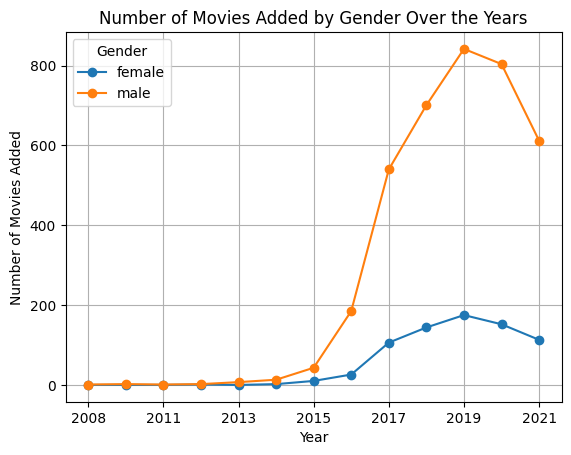

In [130]:
# Group by 'year_added' and 'gender', then count the occurrences
grouped = df.groupby(['year_added', 'gender']).size().unstack(fill_value=0)

# Plotting
grouped.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Movies Added')
plt.title('Number of Movies Added by Gender Over the Years')
plt.legend(title='Gender')
plt.grid(True)
plt.show()